In [1]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
        'width': 1920,
        'height': 1080,
        'scroll': True,
})

{'width': 1920, 'height': 1080, 'scroll': True}

# Week 03: Wednesday, AST 5011: Astrophysical Systems

## Stellar Energy Sources

### Michael Coughlin <cough052@umn.edu>

With contributions totally ripped off from Carl Fields (UA), Mike Zingale (SUNY), Cole Miller (UMD), and Abi Nolan (Purdue).


# Stellar Energy Sources: Gravitation

## Why Gravity Matters (Even Though It Can’t Power the Sun Forever)

In previous classes, we discussed possible energy sources that could power stars. What ultimately rules out everything except nuclear fusion is the combination of:

1. The energy per unit mass of the process, and  
2. The long-term stability of the process.

Let’s quantify these for the Sun.

## Energy Budget of the Sun

The Sun’s luminosity is

$L_\odot \approx 3.8 \times 10^{33}\ \mathrm{erg\ s^{-1}}$

Over its lifetime so far (~4.6 Gyr):

$E_\mathrm{tot} \approx L_\odot \cdot t_\odot \sim 5.5 \times 10^{50}\ \mathrm{erg}$

With a solar mass

$M_\odot \approx 2 \times 10^{33}\ \mathrm{g}$

this corresponds to an energy release per gram of

$\frac{E}{M} \sim 2.8 \times 10^{17}\ \mathrm{erg\ g^{-1}}$

### Comparison of Energy Sources

| Process | Energy per mass (erg g⁻¹) | Viable for Sun? |
|---------|----------------------------|----------------|
| Chemical reactions | ~10¹² | Too small |
| Gravitational contraction | ~10¹⁵ | Too small |
| Nuclear fission | ~10¹⁸ | Short-lived / unstable |
| Nuclear fusion (H → He) | ~10²⁰ | Perfect |

> In-class question: Why does both the energy per mass and the stability of the process matter?

<details>
<summary>Solution</summary>

- Energy per mass determines whether a star can be supported against gravity. A process that produces too little energy cannot counteract the gravitational binding energy per unit mass.  
- Stability requires the process to allow the star to remain in hydrostatic equilibrium over long timescales. Purely gravitational contraction can temporarily support a star, but it cannot sustain stable luminosity over billions of years.  
- In other words, a star can only exist if the pressure support (from thermal, degeneracy, or radiation pressure) balances gravity and if small perturbations do not lead to runaway contraction or expansion.

</details>

## Gravitational Binding Energy

To understand gravity as a source of energy, we compute the gravitational binding energy — the energy required to remove a star’s material layer by layer and disperse it to infinity.

For a spherically symmetric star:

$E_\mathrm{grav} = \int_0^R \frac{G M(<r)}{r} \, \rho(r) \, 4\pi r^2 dr$

where $M(<r)$ is the mass enclosed within radius $r$.

### Example: Constant-Density Sphere

If the density is uniform, $\rho(r) = \rho_0$, then

$M(<r) = \frac{4}{3}\pi \rho_0 r^3$

and the gravitational energy integral yields

$E_\mathrm{grav} = \frac{3}{5} \frac{G M^2}{R}$

Note: Real stars are centrally concentrated, so in practice:

$E_\mathrm{grav} \sim \frac{G M^2}{R}$ with a larger prefactor for central concentration.

> In-class question: Why does central concentration increase the prefactor?

<details>
<summary>Solution</summary>

- A centrally concentrated star has more mass near the center. Inner layers feel a stronger gravitational pull, increasing the energy required to disperse the star.  
- This increases the magnitude of $E_\mathrm{grav}$ compared to a uniform-density sphere.  
- Central concentration affects both the total energy budget and the stability of the star: tightly bound stars require more pressure support to remain in equilibrium.

</details>

## Virial Theorem and Stellar Energy

The Virial theorem relates total energy $E_\mathrm{tot}$, thermal energy $U$, and gravitational energy $E_\mathrm{grav}$ in a star:

$2 U + E_\mathrm{grav} = 0 \quad \Rightarrow \quad U = -\frac{1}{2} E_\mathrm{grav}$

- This explains why only half of the energy released by contraction actually heats the star; the other half is radiated away.  
- Combining the Virial theorem with the Kelvin–Helmholtz timescale shows that stars powered purely by contraction would be much more luminous initially and fade rapidly.


### In-class Exercise: Gravitational Energy and Central Concentration

We know the gravitational binding energy of a star depends on how mass is distributed:

$$
E_G = -\frac{3}{5} \frac{G M^2}{R} \quad \text{(uniform density)}
$$

For a centrally concentrated star, the prefactor can be larger in magnitude. We will explore this numerically.

#### Tasks

1. Consider two idealized density profiles for a star of mass $M = 1 M_\odot$ and radius $R = 1 R_\odot$:

   - Uniform: $\rho(r) = \frac{3 M}{4\pi R^3}$  
   - Centrally concentrated: $\rho(r) = \rho_c (1 - (r/R)^2)$, with $\rho_c$ chosen so total mass equals $M$

2. Write a Python function to compute the enclosed mass $M_r(r)$ and the differential gravitational energy:

$$
dE_G = - \frac{G M_r(r) \, dm}{r}, \quad dm = 4 \pi r^2 \rho(r) dr
$$

3. Integrate $dE_G$ over $r \in [0, R]$ to compute the total gravitational energy $E_G$ for both density profiles.

4. Compare the prefactors and discuss: which profile is more tightly bound and why?

In [ ]:
import numpy as np

# Constants
G = 6.6743e-8          # cgs
Msun = 1.989e33
Rsun = 6.96e10

M = Msun
R = Rsun
N = 1000               # radial points
r = np.linspace(0, R, N)[1:]  # avoid r=0
dr = r[1] - r[0]

# Uniform density
rho_uniform = 3*M / (4*np.pi*R**3)

# Central concentration
rho_c = 15*M / (8*np.pi*R**3)   # ensures total mass = M
rho_conc = rho_c * (1 - (r/R)**2)

# TODO: define function to compute M_r(r) and dE_G
# def grav_energy(r, rho):

# Compute total gravitational energy for both profiles
# E_uniform = grav_energy(r, rho_uniform)
# E_conc = grav_energy(r, rho_conc)

# print("E_uniform:", E_uniform)
# print("E_conc:", E_conc)

<details>
<summary>Solution </summary>

```python
def grav_energy(r, rho):
    dm = 4 * np.pi * r**2 * rho * dr
    M_r = np.cumsum(dm)  # enclosed mass
    dE = -G * M_r * dm / r
    return np.sum(dE)

E_uniform = grav_energy(r, rho_uniform)
E_conc = grav_energy(r, rho_conc)

print("E_uniform = {:.2e} erg".format(E_uniform))
print("E_conc = {:.2e} erg".format(E_conc))
```

**Discussion:**

- The centrally concentrated profile has a **larger magnitude** gravitational energy, i.e., it is more tightly bound.

</details>

## The Kelvin–Helmholtz Timescale

For the Sun, the gravitational binding energy is approximately

$E_\mathrm{grav} \approx \frac{G M_\odot^2}{R_\odot} \approx 3.8 \times 10^{48}\;\mathrm{erg}$

Dividing by the solar luminosity gives the Kelvin–Helmholtz timescale:

$\tau_\mathrm{KH} = \frac{E_\mathrm{grav}}{L_\odot} \approx 3 \times 10^7\;\mathrm{yr}$

This was a major crisis in 19th-century physics because geology indicated that the Earth (and the Sun) must be much older.

In-class question: Why is the KH time the maximum lifetime for a gravity-powered Sun?

<details>
<summary>Solution</summary>

The Kelvin–Helmholtz timescale estimates how long a star can shine if its luminosity comes purely from gravitational contraction:

$t_{\rm KH} \sim \frac{G M^2}{R L}$

Key points:

1. The KH time assumes all of the gravitational binding energy can be converted into radiative energy.  
2. In reality, only nuclear fusion sustains the Sun for billions of years; gravitational contraction is insufficient.  
3. Therefore, if the Sun were powered only by gravity, it could not shine longer than $t_{\rm KH} \sim 3 \times 10^7$ years.  
4. Any process supplying less energy than the full gravitational potential would shorten the lifetime, so the KH time is a maximum.

</details>

## Gravity as a Real Energy Source

Although gravity cannot power the Sun for billions of years, it does dominate many systems:

### Protostars

- Energy source: contraction  
- Lifetime roughly the Kelvin–Helmholtz time  
- Early contraction is rapid; later contraction slows  

Free-fall time limit:

$\tau_\mathrm{ff} \sim \sqrt{\frac{R^3}{G M}}$

### Gas Giants (for example, Jupiter)

Internal luminosity:

$L_J \approx 4.6 \times 10^{24}\;\mathrm{erg\,s^{-1}}$

Gravitational energy:

$E_\mathrm{grav} \approx 3.7 \times 10^{43}\;\mathrm{erg}$

Timescale:

$\tau \approx 2.6 \times 10^{11}\;\mathrm{yr}$

In-class question: Why can Jupiter still shine gravitationally today?

<details>
<summary>Solution</summary>

Jupiter continues to emit energy because it is still slowly contracting under its own gravity:

1. Even though it does not undergo nuclear fusion, its gravitational potential energy is gradually being converted into heat.  
2. This contraction powers a small but measurable luminosity, mostly in the infrared.  
3. The KH timescale for Jupiter is extremely long, so it can continue shining gravitationally over the age of the solar system.  
4. This is why gas giants like Jupiter and Saturn are warmer than expected from absorbed solar radiation alone.

</details>

## Stars, Brown Dwarfs, and Planets

- Stars: hydrogen fusion  
- Brown dwarfs: temporary deuterium fusion  
- Gas giants: gravitational contraction only  

This distinction is fundamentally about interior temperature.

## Gravitational Collapse and Supernovae

For massive stars:

- Lifetime fusion energy: roughly a few $\times 10^{51}$ erg  
- Neutron star formation:

$E \sim \frac{G M_{\rm NS}^2}{R_{\rm NS}} \sim \text{few} \times 10^{53}\;\mathrm{erg}$

Gravity releases about 100 times more energy than fusion. This energy powers the supernova explosion.

## Other Energy Reservoirs $\sim GM^2/R$

- Rotation (for example, pulsars)  
- Thermal energy (via the virial theorem)  
- Magnetic energy (upper bound)

In-class question: Why does gravity set the maximum scale for so many energy sources?

<details>
<summary>Solution</summary>

Gravity sets the maximum energy scale because most astrophysical objects are self-gravitating:

1. The gravitational potential energy of an object is roughly $E_{\rm grav} \sim G M^2 / R$.  
2. Any process that taps internal energy (thermal, nuclear, degeneracy) is ultimately limited by the binding energy of the object; releasing more energy than $|E_{\rm grav}|$ would unbind it.  
3. This applies to stars (fusion), planets (gravitational contraction), and accretion disks (gravitational energy converted to radiation).  
4. Therefore, gravity naturally sets the maximum energy reservoir available for powering astrophysical phenomena.

</details>

## Other Non-Fusion Energy Sources

### Crystallization

- Energy per ion: roughly $k T_m$  
- Relevant for:  
  - Old white dwarfs  
  - Terrestrial planets  

Low energy, but astrophysically important in specific cases.

### Fission

- Energy per mass: roughly $10^{-3} c^2$  
- Not viable for stars because:  
  - Insufficient heavy elements  
  - Critical mass leads to explosive instability

In-class question: Why is stability just as important as energy yield?

<details>
<summary>Solution</summary>

Stability is crucial because even if a process releases sufficient energy per unit mass, an unstable configuration would either collapse or explode. For example, fission in a star would be explosive rather than a steady energy source.  

In stars, the energy release must be both sufficient and regulated over long timescales for sustained luminosity.

</details>

## Big Picture

Gravity:

- Sets fundamental energy scales  
- Powers protostars, planets, accretion, and collapse  
- Explains why fusion is necessary for long-lived stars

Whenever you see $GM^2/R$ in astrophysics, pay attention — it usually matters.


### In-class Exercise: Kelvin–Helmholtz Timescale

We want to explore how the Kelvin–Helmholtz (KH) timescale depends on stellar mass and radius, and how it compares to the Sun.

The KH timescale is defined as:

$$
\tau_\mathrm{KH} = \frac{E_\mathrm{grav}}{L} \sim \frac{G M^2}{R L}
$$

where $E_\mathrm{grav}$ is the gravitational binding energy, $M$ is the stellar mass, $R$ is the stellar radius, and $L$ is the luminosity.

#### Tasks:

1. Compute $\tau_\mathrm{KH}$ for a star with the following properties:

| Star | $M$ [$M_\odot$] | $R$ [$R_\odot$] | $L$ [$L_\odot$] |
|------|-----------------|-----------------|-----------------|
| Sun  | 1.0             | 1.0             | 1.0             |
| Star A | 0.5           | 0.7             | 0.2             |
| Star B | 2.0           | 1.5             | 10.0            |

2. Plot $\tau_\mathrm{KH}$ as a function of mass for a range of solar-type stars (0.1–10 $M_\odot$), assuming $R \propto M^{0.8}$ and $L \propto M^{3.5}$. Use a log-log scale.

3. Compare the KH timescale to the main-sequence lifetime. Which stars would shine primarily via gravitational contraction if fusion did not occur?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants (cgs)
G = 6.6743e-8          # cm^3 g^-1 s^-2
M_sun = 1.989e33       # g
R_sun = 6.96e10        # cm
L_sun = 3.828e33       # erg/s

# Star properties: [M, R, L] in solar units
stars = np.array([
    [1.0, 1.0, 1.0],
    [0.5, 0.7, 0.2],
    [2.0, 1.5, 10.0]
])

# Compute KH timescale
tau_KH = # add here

# Convert seconds to years
tau_KH_yr = tau_KH / (3600*24*365.25)
print("KH timescales (yr):", tau_KH_yr)

# Mass range for plotting
M_vals = np.logspace(-1, 1, 200)  # 0.1 - 10 Msun
R_vals = M_vals**0.8               # assume R ~ M^0.8
L_vals = M_vals**3.5               # assume L ~ M^3.5

# KH timescale as a function of mass
# tau_vals = # add here

plt.figure(figsize=(6,5))
plt.loglog(M_vals, tau_vals / (3600*24*365.25))
plt.xlabel("Mass [M_sun]")
plt.ylabel("KH timescale [yr]")
plt.title("Kelvin–Helmholtz Timescale vs Mass")
plt.grid(True, which='both', ls='--')
plt.show()

<details>
<summary>Solution</summary>

```python
# Compute KH timescale for given stars
tau_KH = G * (stars[:,0]*M_sun)**2 / (stars[:,1]*R_sun * stars[:,2]*L_sun)

# KH timescale as a function of mass
tau_vals = G * (M_vals*M_sun)**2 / (R_vals*R_sun * L_vals*L_sun)
```

**Notes / Interpretation:**

- Lower-mass stars have longer KH timescales but also much lower luminosities.
- Higher-mass stars have very short KH timescales compared to main-sequence lifetimes.
- For the Sun, $\tau_\mathrm{KH} \sim 3\times10^7$ yr — far shorter than its actual lifetime, showing that fusion is needed for long-term stability.
- Stars below ~0.5 $M_\odot$ have KH times comparable to or longer than the pre-main-sequence contraction time, so gravitational contraction dominates early on.

</details>

# Basics of Thermonuclear Fusion

This section introduces the fundamental physical principles behind nuclear fusion in stars.

## Nuclear Potential and the Fusion Barrier

Consider two nuclei interacting as a function of their separation $r$. Define the zero of energy when the nuclei are at rest at infinite separation.

- At large separations, electrostatic repulsion dominates:

$E(r) \sim \frac{Z_1 Z_2 e^2}{r}$

where $Z_1$ and $Z_2$ are the proton numbers.  

- At very small separations ($r \lesssim 1$ fm), the strong nuclear force becomes dominant and binds the nucleons together. The total potential energy becomes negative.  

Fusion occurs if nuclei approach closely enough for the strong force to act.

### In-class question

Why does electrostatic repulsion dominate at large distances, while the strong force dominates only at short distances?

<details>
<summary>Solution</summary>

- Electrostatic (Coulomb) forces act between charged particles over long distances and fall off as $1/r^2$, so repulsion persists even at distances larger than nuclear scales.  
- The strong nuclear force is extremely strong but short-range, effective only at distances $\sim 1$ fm.  
- Therefore, at large separations, Coulomb repulsion dominates. At short separations, the strong force overcomes repulsion and binds nucleons.  

</details>

## Classical vs Quantum Picture

Classically, fusion requires nuclei to have enough kinetic energy to overcome the Coulomb barrier.

- Typical Coulomb barrier for proton–proton fusion:

$E_{\rm barrier} \sim 1~{\rm MeV}$

- Equivalent temperature:

$T \sim 10^{10}~{\rm K}$

- Core temperature of the Sun:

$T_c \sim 1.5 \times 10^7~{\rm K}$

Clearly, classical physics alone cannot explain fusion in stars.

## Quantum Tunneling

Quantum mechanics allows particles to tunnel through potential barriers. The transmission probability for a particle of energy $E$ through a barrier $V(x)$ is:

$T(E) = \exp\left[-2 \int dx \, \sqrt{\frac{2m}{\hbar^2}\left(V(x)-E\right)} \right]$

### In-class question

Why does tunneling allow fusion at temperatures far below the classical barrier temperature?

<details>
<summary>Solution</summary>

- Quantum tunneling allows nuclei with $E < E_{\rm Coulomb}$ a finite probability to penetrate the barrier.  
- In the Sun, $T_c \ll E_{\rm barrier}/k_B$, but a small fraction of protons still tunnel, sustaining fusion and the Sun's luminosity.

</details>

## Density-Driven Fusion and the Fermi Energy

From the uncertainty principle:

$\Delta x \, \Delta p \gtrsim \hbar$

For number density $n$:

$\Delta x \sim n^{-1/3}$

Fermi momentum:

$p_F \sim \hbar n^{1/3}$

Fermi energy (non-relativistic):

$E_F = \frac{p_F^2}{2m}$

## Cross Sections and Reaction Rates

The reaction rate per unit volume:

$R = \sigma(v) \, v \, n_1 n_2$

For a thermal distribution:

$\langle \sigma v \rangle =
\left(\frac{8}{\pi m}\right)^{1/2}
(kT)^{-3/2}
\int_0^\infty \sigma(E) E e^{-E/kT} \, dE$

## The Gamow Peak

For non-resonant reactions:

$\sigma(E) = \frac{S(E)}{E} e^{-2\pi\eta}$

with

$\eta = \frac{Z_1 Z_2 e^2}{\hbar v}$

The competition between tunneling and thermal suppression produces the Gamow peak.


### In-class question
Why does a small change in temperature significantly shift the Gamow peak and fusion rate?

<details>
<summary>Solution</summary>

Both the Maxwell-Boltzmann probability and the tunneling probability factors are exponential in $E$. A small increase in $T$ increases the number of particles at higher energies **exponentially**, shifting $E_0$ and enhancing the tunneling probability.

The fusion rate $\langle \sigma v \rangle \sim \exp(-3 E_G / kT)^{1/3}$ is extremely sensitive to $T$. Even a few percent change in core temperature can change the rate by **orders of magnitude**.

</details>


## Temperature Sensitivity of Fusion Rates

Because fusion rates depend exponentially on temperature, they are often approximated as power laws:

$$
\epsilon = \epsilon_0 \, \rho^\lambda T^\nu
$$

where:
- $\lambda$ describes density sensitivity
- $\nu$ is often very large (10–40)

This explains:
- Strong thermal regulation in stars
- Long main-sequence lifetimes
- Short, violent late burning stages

### In-class question
Why does a large value of $\nu$ help stabilize stars against collapse or runaway heating?

<details>
<summary>Solution</summary>

Rewriting the above, $\nu$ is the logarithmic derivative of energy generation with respect to temperature:

$$
\nu = \frac{\partial \ln \epsilon}{\partial \ln T}.
$$

1. High $\nu$ implies strong temperature sensitivity:  
   - A small rise in temperature causes a large increase in energy generation.  
   - A small drop in temperature causes a large decrease in energy generation.

2. Negative feedback stabilizes the star:  
   - If the star heats up slightly, energy generation spikes, causing expansion.  
   - Expansion reduces density and temperature, decreasing energy generation.  
   - If the star cools slightly, energy generation drops, contraction increases temperature, restoring the balance.

3. Outcome:  
   - High $\nu$ amplifies the feedback between energy generation and stellar structure.  
   - This prevents runaway heating or collapse, helping maintain hydrostatic and thermal equilibrium.

**Key point:** Strong temperature sensitivity allows the star to self-regulate, which stabilizes it against perturbations.

</details>

## Nuclear Binding Energy and Stellar Power

The binding energy per nucleon:
- Increases from hydrogen to iron
- Peaks near $^{56}$ Fe
- Decreases for heavier nuclei

Consequences:
- Fusion of light nuclei releases energy
- Fusion beyond iron is endothermic

Most stellar energy comes from:
$$
^1{\rm H} \rightarrow ^4{\rm He}
$$

This releases $\sim 7 \textrm{MeV}$ per nucleon, far more than later fusion stages.

### In-class question
Why do stars spend most of their lives burning hydrogen rather than heavier elements?

<details>
<summary>Solution</summary>

1. Abundance of hydrogen:  
   - Hydrogen is the most abundant element in stars (typically $X \sim 0.7$).  
   - More fuel means longer available burning time.

2. Lower Coulomb barrier: 
   - Hydrogen nuclei (protons) have the smallest charge ($Z=1$), so the electrostatic repulsion is minimal.  
   - Fusion of heavier nuclei requires higher temperatures to overcome the Coulomb barrier, which are only reached later in stellar evolution.

3. Lower central temperatures needed: 
   - Hydrogen fusion occurs at central temperatures of ~$10^7$ K, achievable early in a star’s life.  
   - Heavier element fusion requires $10^8$–$10^9$ K, which are only attained after hydrogen is depleted in the core.

4. Longer timescale:  
   - The nuclear burning timescale is inversely proportional to the luminosity and the amount of fuel.  
   - Hydrogen-burning cores last billions of years, while helium and heavier element burning stages are much shorter.

</details>

### In-class Exercise: Temperature Dependence of Fusion Rates

In stars, the nuclear fusion rate per particle pair can be approximated as:

$$
R(T) \propto T^\nu \exp\left(-\frac{b}{T^{1/3}}\right)
$$

where:

- $T$ is the temperature in K,  
- $\nu$ is a power-law exponent (from cross-section behavior),  
- $b$ is related to the Gamow energy and Coulomb barrier.

**Tasks**

1. Write a Python function to compute the normalized fusion rate $R(T)$ for given $T$, $\nu$, and $b$.  
2. Plot $R(T)$ versus $T$ on a logarithmic temperature scale ($10^6$ K to $10^8$ K) for:
   - $\nu = 4$ and $b = 20$  
   - $\nu = 6$ and $b = 20$  
3. Compare how sensitive $R(T)$ is to small changes in $T$ for the two different $\nu$ values.  
4. Identify the approximate "Gamow peak" region where $R(T)$ is largest.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def fusion_rate(T, nu, b):
    """
    Compute normalized fusion rate as R ~ T^nu * exp(-b / T^(1/3))
    T : Temperature array [K]
    nu : exponent of temperature
    b : Gamow constant
    """
    # add here
    return # add here

# Temperature range
T = np.logspace(6, 8, 500)  # K

# Example parameters
params = [(4, 20), (6, 20)]

plt.figure(figsize=(7,5))

for nu, b in params:
    R = fusion_rate(T, nu, b)  # add here
    plt.plot(T, R, label=f"nu={nu}, b={b}")

plt.xscale('log')
plt.xlabel("Temperature [K]")
plt.ylabel("Normalized Fusion Rate")
plt.title("Temperature Dependence of Fusion Rates")
plt.legend()
plt.grid(True, which='both', ls='--')
plt.show()

<details>
<summary>Solution</summary>

**Key Python Lines**

```python
def fusion_rate(T, nu, b):
    # T in K
    return T**nu * np.exp(-b / T**(1/3))

for nu, b in params:
    R = fusion_rate(T, nu, b)
```

**Discussion / Takeaways**

1. Small changes in $T$ strongly affect $R(T)$ because of the exponential term, which represents the Gamow factor.  
2. Larger $\nu$ increases the power-law sensitivity, so higher $\nu$ makes the rate even more temperature-sensitive.  
3. The peak of $R(T)$ occurs at a temperature where the product of the slowly rising $T^\nu$ term and the rapidly falling exponential term is maximal. This corresponds to the **Gamow peak**.  
4. This exercise explains why stars are extremely sensitive to central temperature for fusion reactions and why they spend most of their lives burning hydrogen rather than heavier elements.

</details>

# Specific Fusion Reactions

## Overview
In the following, we move from general principles of fusion to specific fusion reactions relevant for stars.  
As discussed previously, the overwhelming majority of nuclear binding energy release occurs when hydrogen is fused into helium-4, so we begin there.

## Hydrogen to Helium: Global Reaction

A naive way to write hydrogen fusion is:

$4^1\textrm{H} \rightarrow ^4\textrm{He}$

Charge conservation requires electrons, and lepton number conservation requires neutrinos:

$4^1\textrm{H} + 2e^- \rightarrow ^4\textrm{He} + 2\nu_e$

Total energy released:  

$Q = 26.73\ \textrm{MeV}$

Neutrinos escape the star, so their energy does not contribute to pressure support.

### In-class question

Why must this reaction occur through multiple stages rather than a single step?

<details>
<summary>Solution</summary>

Many nuclear reactions in stars—like the proton-proton chain—cannot proceed in a single step because:

1. Energy and momentum conservation constraints: Direct fusion of three or more nuclei simultaneously is extremely unlikely; the probability of three-body collisions at the required densities and temperatures is vanishingly small.  
2. Quantum tunneling limitations: The Coulomb barrier suppresses reactions between positively charged nuclei. Multi-step reactions allow the system to overcome these barriers sequentially.  
3. Stability of intermediate products: The reaction chain passes through stable or semi-stable nuclei (like deuterium or $^3$He) that can exist long enough for the next fusion step.  
4. Reaction rate feasibility: Multi-step processes drastically increase the likelihood of energy release at stellar densities and temperatures, making hydrogen burning efficient over billions of years.

</details>

## Why Hydrogen Fusion Is Slow

1. Six particles cannot realistically interact simultaneously.  
2. Two protons must convert into neutrons → weak interaction, which is slow.

This weak interaction bottleneck is why stars live for billions of years.

## Proton–Proton (p–p) Reaction

The first step of hydrogen burning is:

$^1\mathrm{H} + ^1\mathrm{H} \rightarrow ^2\mathrm{H} + e^+ + \nu_e$

Energy released (including positron annihilation):

$Q \approx 1.442\ \mathrm{MeV}$

### Reaction rate (per volume)

$r_{p\!-\!p} =
\frac{1.15\times10^9}{T_9^{2/3}}
X^2
\left(\frac{\rho}{1\ \mathrm{g\,cm^{-3}}}\right)^2
e^{-3.38/T_9^{1/3}}
\quad \mathrm{cm^{-3}\,s^{-1}}$

where $T_9 = T / 10^9\ \mathrm{K}$.

### In-class question

Why does the rate scale as $X^2\rho^2$?

<details>
<summary>Solution</summary>

The fusion rate per unit volume depends on the probability of two nuclei interacting:

1. Number density dependence: If the mass fraction of hydrogen is $X$ and the total density is $\rho$, the number density of protons is $n \sim X \rho / m_p$.  
2. Two-body collisions: Fusion requires two nuclei to collide, so the reaction rate per unit volume scales as the product of their number densities:  
   $$
   R \sim n_1 n_2 \sim \left(\frac{X \rho}{m_p}\right)^2
   $$
3. Quadratic scaling: This is why the rate scales as $X^2 \rho^2$ for proton-proton fusion (or similar reactions involving identical nuclei).

</details>

## Energy Generation Estimate (Solar Core)

Typical solar core values:

- $T = 1.5\times10^7\ \mathrm{K}$  
- $\rho = 100\ \mathrm{g\,cm^{-3}}$  
- $X = 0.7$  

This gives:

- $\sim 10^6$ reactions g$^{-1}$ s$^{-1}$  
- $\epsilon \sim 2\ \mathrm{erg\,g^{-1}\,s^{-1}}$

### In-class question

Compare this with chemical burning. Why are stars still powerful?

<details>
<summary>Solution</summary>

Stars are extremely powerful despite the low reaction rates for nuclear fusion because:

1. Energy per reaction: Nuclear reactions release millions of times more energy per particle than chemical reactions (MeV vs eV).  
2. High particle numbers: Stars contain enormous numbers of nuclei (≈10⁵⁷ protons in the Sun), so even rare fusion events release tremendous total energy.  
3. Sustained over long times: The fusion rate is slow enough to avoid rapid exhaustion, giving stars long lifetimes but sufficient luminosity.  
4. Chemical comparison: Chemical burning depends on electron rearrangement (few eV per bond) and would be negligible on stellar scales, producing far less energy than needed to sustain the observed luminosity.

**Takeaway:** The combination of huge energy per reaction and the sheer number of reacting particles makes stars vastly more energetic than any chemical source.

</details>

## Temperature Sensitivity

The effective temperature exponent:

$\nu_{p\!-\!p} = \frac{11.3}{T_6^{1/3}} - \frac{2}{3}$

At solar conditions: $\nu \approx 4$

Lesson: weak-interaction–limited reactions are weakly temperature sensitive.

## Formation of Helium-3

Once deuterium forms, it rapidly reacts:

$^1\mathrm{H} + ^2\mathrm{H} \rightarrow ^3\mathrm{He} + 5.493\ \mathrm{MeV}$

This reaction is fast (no weak interaction).

## Proton–Proton Chains

Helium-3 can form helium-4 via three branches:

- pp-I  
- pp-II  
- pp-III

Effective energy generation rate:

$\epsilon_{\rm pp} \approx
\frac{2.4\times10^4\,\rho X^2}{T_9^{2/3}}
e^{-3.38/T_9^{1/3}}
\quad \mathrm{erg\,g^{-1}\,s^{-1}}$

## CNO Cycle

At higher temperatures, hydrogen burns via the CNO cycles.

Example (CNO-I):

$^{12}\mathrm{C} \rightarrow \cdots \rightarrow ^{12}\mathrm{C} + ^4\mathrm{He}$

This is a catalytic cycle.

### Energy generation rate

$\epsilon_{\rm CNO} \approx
\frac{4.4\times10^{25}\,\rho X Z}{T_9^{2/3}}
e^{-15.2/T_9^{1/3}}
\quad \mathrm{erg\,g^{-1}\,s^{-1}}$

### Temperature sensitivity

$\nu_{\rm CNO} = \frac{50.8}{T_6^{1/3}} - \frac{2}{3}$

At $T \sim 2\times10^7$ K: $\nu \sim 18$

### In-class question

Why does this lead to convective cores in massive stars?

<details>
<summary>Solution</summary>

Massive stars have very temperature-sensitive nuclear reactions, with energy generation scaling roughly as $\epsilon \propto T^\nu$ with large $\nu \sim 15-20$ for the CNO cycle.  

1. Strong central heating: The energy generation is extremely concentrated near the core.  
2. Steep temperature gradient: To carry this energy outward radiatively, the temperature gradient must be very steep.  
3. Schwarzschild criterion: When the radiative temperature gradient exceeds the adiabatic gradient, the core becomes convectively unstable.  
4. Result: Convection develops in the core, efficiently transporting energy and mixing nuclear fuel.  

</details>

## Helium Burning: Triple-Alpha Process

Direct $^4$He + $^4$He fusion fails due to unstable $^8$Be.

Instead:

$3 ^4\mathrm{He} \rightarrow ^{12}\mathrm{C}$

Requires:

- $T \gtrsim 10^8\ \mathrm{K}$  
- No weak interactions → very fast

### Energy generation

$\epsilon_{3\alpha} =
\frac{5.1\times10^8\,\rho^2 Y^3}{T_9^3}
e^{-4.4/T_9}
\quad \mathrm{erg\,g^{-1}\,s^{-1}}$

### Temperature exponent

$\nu_{3\alpha} = \frac{4.4}{T_9} - 3$

At $10^8$ K: $\nu \sim 40$

## Advanced Burning Stages

- Carbon burning  
- Oxygen burning  
- Silicon burning  
- Photodisintegration  
- Nuclear statistical equilibrium  

At these temperatures:

- Neutrino losses dominate  
- Energy generation becomes inefficient

## Summary

- Hydrogen burning: pp chains (low $T$), CNO cycles (high $T$)  
- Helium burning: triple-alpha  
- Advanced burning: increasingly complex, short-lived  
- Neutrinos: dominate energy loss at high $T$  

The nuclear binding energy curve explains stellar lifetimes.


### In-class Exercise: Hydrogen Fusion Rates

In this exercise, we explore the proton-proton (p–p) reaction rate in the Sun and compare it with the CNO cycle. You will use Python to compute and visualize how reaction rates depend on temperature and composition.

#### Background

The p–p reaction rate per volume is approximately:

$$
r_{p\!-\!p} =
\frac{1.15\times10^9}{T_9^{2/3}}
X^2
\left(\frac{\rho}{1\ \mathrm{g\,cm^{-3}}}\right)^2
e^{-3.38/T_9^{1/3}}
\quad \mathrm{cm^{-3}\,s^{-1}}
$$

where:
- $T_9 = T / 10^9\,\mathrm{K}$
- $X$ = hydrogen mass fraction
- $\rho$ = density (g cm$^{-3}$)

The CNO cycle rate is:

$$
r_{\rm CNO} \propto \rho X Z T_9^{-2/3} e^{-15.2/T_9^{1/3}}
$$

where $Z$ is the metallicity.

---

#### Tasks

1. Plot the p–p reaction rate as a function of temperature $T$ for a fixed solar core density $\rho = 100\,\mathrm{g\,cm^{-3}}$ and hydrogen fraction $X = 0.7$.
2. Overplot the CNO reaction rate for the same density and $X$, assuming $Z = 0.02$.
3. Identify the temperature at which the CNO cycle overtakes the p–p chain.
4. Plot the effective temperature exponent $\nu = d\ln \epsilon / d \ln T$ for both reactions.

#### Questions

1. Which reaction dominates at solar core temperatures? At what temperature does the dominance switch?  
2. Why is the p–p reaction weakly temperature sensitive while the CNO cycle is highly temperature sensitive?  
3. How does the temperature sensitivity affect convective stability in massive stars?  
4. Why must hydrogen fusion proceed through multiple stages?  
5. Why do stars release vastly more energy per reaction than chemical reactions?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
rho = 100        # g/cm^3
X = 0.7
Z = 0.02

# Temperature range (K)
T = np.logspace(6, 8, 400)
T9 = T / 1e9

# p-p reaction rate
r_pp = # FILL ME

# CNO reaction rate (arbitrary normalization)
r_CNO = # FILL ME

# Temperature exponent (numerical derivative)
nu_pp = np.gradient(np.log(r_pp), np.log(T))
nu_CNO = np.gradient(np.log(r_CNO), np.log(T))

# Plot rates
plt.figure(figsize=(8,5))
plt.loglog(T, r_pp, label='p-p chain')
plt.loglog(T, r_CNO, label='CNO cycle')
plt.xlabel("Temperature [K]")
plt.ylabel("Reaction rate [cm^-3 s^-1]")
plt.title("Hydrogen Fusion Rates")
plt.legend()
plt.grid(True, which='both', ls='--')
plt.show()

# Plot temperature exponents
plt.figure(figsize=(8,5))
plt.semilogx(T, nu_pp, label='p-p chain')
plt.semilogx(T, nu_CNO, label='CNO cycle')
plt.xlabel("Temperature [K]")
plt.ylabel("Effective temperature exponent nu")
plt.title("Temperature Sensitivity of Fusion Reactions")
plt.legend()
plt.grid(True, which='both', ls='--')
plt.show()

<details>
<summary>Solution</summary>

**Key Points:**

1. At $T \sim 1.5\times10^7$ K, the p–p chain dominates. The CNO cycle overtakes it at $T \gtrsim 2\times10^7$ K.  
2. The p–p reaction involves a weak interaction (proton→neutron conversion), making it slow and **weakly temperature sensitive** ($\nu \sim 4$).  
3. The CNO cycle is extremely temperature sensitive ($\nu \sim 15-20$), leading to steep temperature gradients and **convective cores** in massive stars.  
4. Multi-step reactions are required because direct fusion of four protons is extremely unlikely; intermediate nuclei (deuterium, $^3$He) allow stepwise energy release.  
5. Stars release more energy than chemical reactions because nuclear reactions liberate **MeV per nucleus** versus eV for chemical bonds, and stellar cores contain huge numbers of nuclei.

**Key Python Lines:**

```python
# Compute p-p reaction rate
r_pp = 1.15e9 / T9**(2/3) * X**2 * (rho/1)**2 * np.exp(-3.38 / T9**(1/3))

# Compute CNO reaction rate
r_CNO = 4.4e25 / T9**(2/3) * rho * X * Z * np.exp(-15.2 / T9**(1/3))
```

</details>

## Thermonuclear Energy Sources

### Charged Particle Thermonuclear Reactions


Consider a thermonuclear reaction of the form

$$
\large{\alpha} \ (\textrm{"projectile"}) + X \ (\textrm{"target nucleus"}) \rightarrow Z^{*} \ (\textrm{compound nucleus}) \rightarrow Y + \beta \ (\textrm{"products"})
$$

or often written as 

$$
\Large
X(\alpha,\beta)Y
$$

where the left handside is called the **"entrance channel"**, $Z^{*}$ is an intermediate (almost always) excited state as a result of the reaction, that leads to the **"exit channel"** and the corresponding **products**.

### An example reaction 

Consider the following thermonuclear reaction:

$$
\Large
p + ^{11}\textrm{B} \rightarrow ^{12}\textrm{C}^{*}
$$

this compound nucleus can then break up into a various number of products, or exit channels that include,

$$
\Large
\begin{align}
^{12}\textrm{C}^{*} & \rightarrow ^{12}\textrm{C} + \gamma \\
                    & \rightarrow ^{11}\textrm{B} + p \\
                    & \rightarrow ^{11}\textrm{C} + n \\
                    & \rightarrow ^{12}\textrm{N} + e^{-} + \bar{\nu_{\rm{e}}} \\
                    & \rightarrow ^{8}\textrm{Be} + \alpha
\end{align}
$$

where (**) is another excited (or ground) state of $^{12}$C, $\gamma$ is photon, $p$ is proton, $n$ is neutron, $e^{-}$ is electron, $\bar{\nu_{\rm{e}}}$ is an anti-electron type neutrino, and $\alpha$ is a $^{4}$He nucleus.

### Nuclear Energetics

We can begin by defining the **total binding energy** as the energy required to break up and disperse to infinity all the constituent nucleons (protons and neutrons) in that nucleus.

$$
B_{\epsilon} = \textrm{(mass of constituent nucleons − mass of bound nucleus)} \ c^{2} (\rm{MeV})
$$

similarly, we can define the **average binding energy per nucleon**, $B_{\epsilon}/A$, where $A$ is the total nucleon mass number, A (in integer amu).

> This is often used as a measure of the energy required to remove the most energetic nucleon from a given nucleus in its ground state. 


**Average Binding Energy Per Nucleon**

![binding energy](figures/binding_energy.jpg)

**Credit: Data from Wapstra et al. (1988)** - Plotted is the binding energy per nucleon, $B_{\epsilon}/A$, as a function of atomic mass number $A$ for the most stable isobar of $A$. 

For nuclei with mass of $A\lesssim$ 60, we can fuse two light nuclei and energy is released.


In particular, the energy requirement for fusion is 

$$
B_{\epsilon}(1) + B_{\epsilon}(2) \lt B_{\epsilon}(3)
$$

### Example: The triple-alpha reaction ($3\alpha\rightarrow^{12}\textrm{C}$)

Consider the fusion of 3$\alpha$ particles to produce a $^{12}$C nucleus, 
written to account for total binding energy, 

$$
\Large
\begin{align}
3 \times {^{4}\textrm{He}} \rightarrow {^{12}\textrm{C}} \\
3 \times {^{4}\textrm{He}} \ (\textrm{in MeV}) - {^{12}\textrm{C}} \ (\textrm{in MeV}) & = ? \\
3 \times [4\times (-7.1 \ \textrm{MeV})] - 12\times (-7.7 \ \textrm{MeV}) & = ? \\
-85.2 \ \textrm{MeV} + 92.4 \ \textrm{MeV} & = 7.2 \ \textrm{MeV} = Q-\textrm{value} \\  
\end{align}
$$

In practice, mass excess ($\Delta = [M-A]c^2$) tables are used to find $Q$-values. 


Fission on the branch with $A$ greater than about 60 achieves the same end as the above, slowly approaching a saturation value of 8 MeV. 

> nuclei around the iron peak, which are the most tightly bound of all nuclei (per constituent nucleon), are not of much use as an energy source. the end is near. 

### Astrophysical Thermonuclear Cross Sections and Reaction Rates

Lets start by determining the cross section for the reaction $X(\alpha,\beta)Y$
denoted as

$$
\sigma_{\alpha \beta} = \frac{\textrm{number of reactions per unit time per target }X}{\textrm{incident flux of projectiles }\alpha} (\textrm{cm}^{2})
$$

we can define the incident projectile flux as $n_{\alpha}v$ such that the reaction rate per target nucleus is $n_{\alpha}v\sigma_{\alpha \beta}$, leading to the **total reaction rate**

$$
r_{\alpha \beta} = n_{\alpha} n_{X} \sigma_{\alpha \beta}(v)(v) \ (\textrm{cm}^{-3} \ \textrm{s}^{-1})
$$

Here, $n_{X}$ is the target number density. 


We can simplify this by switching to a **center-of-mass system** expression for integrating over all particles in their respective distributions provides a averaged product of cross section and velocity:

$$
r_{\alpha \beta} = n_{\alpha} n_{X} \left < \sigma_{\alpha \beta} \right > (\textrm{cm}^{-3} \ \textrm{s}^{-1})
$$

where here we have introduced the **reduced mass** as $m=m_{\alpha}m_{X}/(m_{\alpha}+m_{X})$.

The cross section can be expressed in the form (usually) as a function of center of mass energy $\mathcal{E}$ as

$$
\sigma_{\alpha \beta} = \pi \lambda^{2}_{dB} g (2\ell+1) \frac{\Gamma_{\alpha}\Gamma_{\beta} }{\Gamma^{2}} f(\mathcal{E})
$$

where $\lambda^{2}_{dB}$ is the reduced DeBroglie wavelength, $f(\mathcal{E})$ is a shape factor, $\frac{\Gamma_{\alpha}\Gamma_{\beta} }{\Gamma^{2}}$ is the joint probability of forming $\alpha+X$ and then $\beta+Y$ through the compound state $Z^{*}$.


>The shape factor can take two forms: **resonant** or **non-resonant**.


**Resonant** - Varies rapidly with energy over some interesting energy range and is strongly peaked at a resonant energy $\mathcal{E}_{r}$.



**Nonresonant** - Shape factory is constant or is slowly varying compared to other factors in the cross section. Occurs when the energy range of interest is far from $\mathcal{E}_{r}$ or when the reaction is intrinsically nonresonant. 


## Nonresonant Reactions

Nuclear reactions of major astrophysical interest are **exothermic**: they produce energy and the $Q$-value is positive in the nuclear energy equation.

In the classical picture, the target and projectile could never combine because the Coulomb barrier cannot be penetrated. However, quantum mechanics can allow this to occur via tunneling with some barrier penetrability factor 

$$
P_{\ell}(\mathcal{E}) \propto e^{-2\pi \eta}
$$

where is the dimensionless Sommerfield factor: 

$$
\eta = \frac{ Z_{\alpha} Z_{X} e^{2}}{\bar{h}v} = 0.1574 Z_{\alpha} Z_{X} \left (\frac{\mu}{\mathcal{E}} \right)^{1/2}
$$

this factor depends strongly on the entrance channel kinetic energy. 

This allows us to bring this together and write the non-resonant form of the cross section

$$
\sigma_{\alpha \beta} = \frac{S(\mathcal{E})}{\mathcal{E}}e^{-2 \pi \eta}
$$

A common procedure is to extract $\sigma_{\alpha \beta}$ experimentally, to energies non less than about 100 keV and plot the **astrophysical S factor**, 

$$
S(\mathcal{E}) = \sigma_{\alpha \beta} \mathcal{E} e^{2 \pi \eta}
$$

and then extract to lower energies expected in stellar environments. This is a major source of uncertainty in stellar nuclear reaction rates. 

Assuming a constanct astrophysical $S$ factor, we can compute a numerical form 
for the averaged cross section:

$$
\left<\sigma_{\alpha \beta}\right> = \frac{1.6\times10^{-15}}{\mu^{1/2}(kT)^{3/2}}S \int^{\inf}_{0} \textrm{exp} \left [ - \left ( \frac{\mathcal{E}}{kT} + \frac{b}{\mathcal{E}^{1/2}} \right ) \right ]
$$

In the above equation the integrand is called the **Gamow peak**.

The structure of the integrand in reflects the combination of two strongly competing factors.

- The barrier penetration factor contributes the second term, which increases rapidly with increasing energy
- the Maxwell–Boltzmann exponential decreases rapidly as energy increases


>The integrand thus increases as energy increases because the Coulomb barrier becomes more penetrable but, to offset that, the number of pairs of particles available for the reaction decreases in the exponential tail of the distribution.

**Example Gamow Integrand** 

![gamow_window](figures/gamow_window.jpg)

The integrand plotted against center-of-mass energy (in keV) for the temperatures $T_6=20$ and $T_6 = 22$. Here, $T_{6}=T (\textrm{K}) / T \times 10^{6} (\textrm{K})$.

> We note the significant dependence of temperature for the integrand and thus the nuclear reaction rate. 

Once the cross section is determined the total reaction rate can be written as 

$$
r_{\alpha \beta} = \rho^{2} N^{2}_{\rm{A}} \frac{X_{\alpha} X_{X}}{A_{\alpha} A_{X}} \left<\sigma_{\alpha \beta}\right>
$$

and the resulting nuclear energy generation rate 

$$
\epsilon_{\alpha \beta} = Q \frac{r_{\alpha \beta}}{\rho}
$$

**Example Astrophysical S factor measurement and extrapolation** 

![s_factor_nr](figures/s_factor_nr.jpg)

**Credit: Fowler et al., 1967** The nonresonant factor S(E) for the reaction 12C (p, γ) 13N with an extrapolation to low energies.



## Resonant Reactions

To capture the resonant portion of the reaction, the form is often treated as a delta function. 

This leads to a form of the resonant cross-section:

$$
\left<\sigma_{\alpha \beta}\right> = \bar{h}^{2} \left ( \frac{2 \pi}{mkT} \right )^{3/2} g(2\ell+1) \frac{\Gamma_{\alpha} \Gamma_{\beta} }{\Gamma} e^{-\mathcal{E}_{r}/kT}
$$

Further simplification assuming the integrated cross section as a delta function leads to 

$$
\left<\sigma_{\alpha \beta}\right> = \left ( \frac{2 \pi \bar{h}^{2}}{mkT} \right )^{3/2} \frac{(\omega \gamma)_{r}}{\bar{h}} e^{-\mathcal{E}_{r}/kT}
$$
The term $(\omega \gamma)_{r}$ as often tabulated and values for specific reactions can be plugged in to further reduce the cross section equation. 

Lastly, the non-resonant and resonant estimates for the cross section are added together to provide the total cross section as a function of temperature. 


## Other Forms of Reaction Rates

### Neutron Capture and the S-Process

**s-process** - a slow process by which excess neutrons are captured onto "seed" nuclei in the iron range of elements. can occur for example in helium shell burning in low mass stars. 

**r-process** - a rapid process by which a rapid succession of neutron captures lead to the formation of heavier and heavier nuclei and requiring a significant amount of neutron captures.
can occur in core-collapse supernovae and neutron star mergers. 

### Weak Interactions

Because of the strong $T$ and $\rho$ dependence on different reactions, it is important to also consider the half-life of the nuclei in question.

It could be the case that beta-decay, _when atomic nucleus emits a high-energy electron or positron_, is the more likely next interaction for the created nucleus. 

For example:

In the ${^{13}\textrm{N}}(p,\gamma){^{12}\textrm{C}}$ reaction we have been following,

$$
{^{13}\textrm{N}}\rightarrow{^{13}\textrm{C}} + e^{+} + \nu_{e}, \tau_{1/2} = 10 (\textrm{min})
$$

and the decay may be the more likley channel. At higher temperatures and densities where the resonant component can contribute, and the capture reaction is comparable to the beta decay timescale. 

Another example is electron capture, consider the example of 

$$
e^{-} + {^{7}\textrm{Be}}\rightarrow{^{7}\textrm{Li}}+\nu_{e}
$$

where the reaction is the capture of a free electron or one in an atomic orbital. 

These are particularly important at **high density** environments where the reduction of free electrons and reduce electron degenracy pressure support such as in the iron core of a massive star.

### Electron Screening

The final consideration for modifications to the reaction rate cross section is an overall reduction to the Coloumb potential due to intervening electrons. The net result is an increase to the penetrability factor and thus the reaction rate: 

$$
\left<\sigma_{\alpha \beta}\right> (\textrm{with screening}) =  \left<\sigma_{\alpha \beta}\right> (\textrm{unscreened}) e^{U_{0}/kT}
$$

>Screening is strongly effected by the density of the stellar environment. 

## The Proton–Proton Chains

The first set of nuclear burning we will discuss is that of the **The Proton–Proton Chains**. A series of reactions that lead to the production of {$^{4}\rm{He}$}.

**Proton–Proton Chain Reactions**

![pp_chains](figures/pp_chains.jpg)

In general, the different reactions and subsequent chains become **more important as the temperature increases**. Another way to visualize these reactions is via a mass number $A$ versus charge $Z$.

**Proton–Proton Chain Reaction Flow**

![pp_chains_flow](figures/pp_chains_flow.jpg)

Starting from ${^{1}\rm{H}}$, the arrows for the reaction sequences in the three $pp$-chains all end up at ${^{4}\rm{He}}$. The slowest reaction in the chain is the pp-reaction itself, leading to it being a bottleneck and controlling the lifetime of the star on the main-sequence. 

Because these rates can contribute differently, one can often define an **effective $Q$-value** based on weights of the contribution for each subchain:

$$
Q_{\rm{eff}} (pp-\textrm{chains}) = 13.116 \left[1 + 1.412 \times 10^{8}(1/X-1)e^{-4.998/T^{1/3}_{9}} \right] \ (\rm{MeV})
$$

depending only on the hydrogen mass fraction, $X$. This allows use to also compute an effective energy generation rate:

$$
\large
\begin{align}
\epsilon_{\rm{eff}} (pp-\textrm{chains})  & = r_{pp} Q_{\rm{eff}} / \rho \\
                    & \approx \frac{2.4\times10^{4} \rho X^2}{T^{2/3}_{9}}
\end{align}
$$

Recall from Table 1.1 in HKT, the temperature dependence for $\epsilon_{pp}\propto^{4}$.



## The Carbon–Nitrogen–Oxygen (CNO) Cycles 

Next, we consider the CNO cycles: a series of proton captures on isotopes of CNO, positron decays and ending with a proton capture to produce ${^{4}\rm{He}}$.


**CNO Cycle Reactions**

![cno](figures/cno.jpg)

Similar to the $pp$-chains we can determine an effective energy generation rate, for the CNO cycle, 
the slowest reaction (lowest reaction rate) in the sequence is the ${^{14}\textrm{N}(p,\gamma)^{15}\textrm{O}}$. This reaction is often referred to as the **bottleneck** reaction rate for stars that burn H via the CNO cycles. 

$$
\large
\begin{align}
\epsilon_{\rm{CNO}} \approx \frac{4.4\times10^{25} \rho XZ}{T^{2/3}_{9}}e^{\frac{-15.228}{T^{1/2}_{9}}}
\end{align}
$$

The temperature exponent is significantly larger than that of the $pp$-chains with $\nu\approx18$.


**Cross over temperature for pp-chains to CNO cycles**

![pp_vs_sno](figures/pp_vs_sno.svg)

## Helium-Burning Reactions

Helium burning in stars will begin in earnest at sufficient tempratures (> $10^{8}$ K) via the first step in the "triple-alpha" reaction:

$$
\alpha + \alpha \rightarrow ^{8}\textrm{Be}
$$

However, recall that ${^{8}\textrm{Be}}$ has a lifetime of only $10^{-16}$ seconds! So, the next stage of the reaction can only proceed at sufficient $T$ and seed ${^{8}\textrm{Be}}$ nuclei available. The next reaction in the sequence is 

$$
\alpha + ^{8}\textrm{Be} \rightarrow ^{12}\textrm{C} + \gamma
$$

Note an intermediate step via the creation of an excited state of 
$^{12}\textrm{C}^{*}$ which can decay back to $^{8}\textrm{Be}$. The main point being that not all forward reactions will lead to creation of $^{12}\textrm{C}$.

We can similarly determine an energy generation rate for triple-$\alpha$:

$$
\large
\begin{align}
\epsilon_{\rm{3\alpha}} \approx \frac{5.1\times10^{8} \rho^{2} Y^3}{T^{3}_{9}}e^{\frac{-4.4027}{T_{9}}}
\end{align}
$$

At a temperature of $T_{8}=1$, the temperature exponent $\nu_{3\alpha}\approx40$!

Next, we have the ${^{12}\textrm{C}}(\alpha,\gamma){^{16}\textrm{O}}$ reaction. 

>“If users find that their results in a given study are sensitive to the rate of the ${^{12}\textrm{C}}(\alpha,\gamma){^{16}\textrm{O}}$ reaction, then they should repeat their calculations with 0.5 times and 2 times the values recommended here.” - Fowler (1985)

This reaction rate, which operates at tempratures of around $0.02\lesssim T_{9}\lesssim10$.

Finally, we have the ${^{16}\textrm{O}}(\alpha,\gamma){^{20}\textrm{Ne}}$ reaction. 

The race between how quickly ${^{12}\textrm{C}}$ is produced via triple-$\alpha$ and how quickly it is consumed via ${^{16}\textrm{O}}(\alpha,\gamma){^{20}\textrm{Ne}}$ is of significant consequence for many different subsequent stellar evolution consequence. For example, the final C/O ratio of white dwarf star can lead to different observational properties. 

## Carbon, Neon, and Oxygen Burning

**Carbon Burning** The first of these advanced burning stages is carbon-burning via the compound heavy ion reaction chains for $^{12}\textrm{C} + ^{12}\textrm{C}$ and their exit channels. 

These compound carbon reactions are following by $(p,\alpha)$ and 
$(p,\gamma)$ reactions to produce primarly ${^{20}\rm{Ne}}$ and at lesser amounts ${^{23}\rm{Na}}$ and ${^{24}\rm{Mg}}$.

The energy generation rate for these two reactions is given by

$$
\large
\begin{align}
\epsilon({^{12}\textrm{C}+^{12}\textrm{C}}) \approx \frac{1.43\times10^{42} Q \eta \rho X^2_{12}}{T^{3/2}_{9}}e^{\frac{-84.165}{T^{-1/3}_{9}}}
\end{align}
$$

These reactions are susceptible to strong electron screening effects.

**Neon Burning** Neon burning takes place via _photodisintegration_ the use of high-energy photons to break up ${^{20}\rm{Ne}}$ via the ${^{20}\rm{Ne}(\gamma,\alpha)^{16}\textrm{O}}$. 

However, temperatures are also high enough to allow the reaction sequence, ${^{20}\rm{Ne}(\alpha,\gamma)^{24}\textrm{Mg}} {^{24}\rm{Mg}(\alpha,\gamma)^{28}\textrm{Si}}$. 

> The net result of neon burning is ${^{16}\rm{O}}$, ${^{24}\rm{Mg}}$, and ${^{28}\rm{Si}}$.

**Oxygen Burning** Oxygen burning proceeds in a similar fashion as carbon this time with three exit channels summarized in the Table below:

**Table of Carbon- and Oxygen-Burning Reactions**

![advanced_burning](figures/advanced_burning.jpg)

The energy generation rate for these reactions is given by

$$
\large
\epsilon({^{16}\textrm{O}}+{^{16}\textrm{O}}) \approx \frac{ 1.3 \times 10^{52} Q \eta \rho X^2_{16}}{T^{2/3}_{9}} e^{\frac{-135.93}{T^{-1/3}_{9}}} \times e^{\left[-0.629 T^{2/3}_{9} - 0.445 T^{4/3}_{9} +0.0103T^{2}_{9}\right]}                                                                                       
$$

We note that ${^{12}\textrm{C} + ^{16}\textrm{O}}$ are possible by the seed $^{12}\textrm{C}$ is used up quickly by $^{12}\textrm{C}+^{12}\textrm{C}$ and the $^{12}\textrm{C} + ^{16}\textrm{O}$ reaction is intrinsically slow. 

The final result of this stage is the production of ${^{28}\rm{Si}}$, ${^{30}\rm{Si}}$, and ${^{32}\rm{S}}$ depending on the conditions in the core. 


## Silicon “Burning” or "Melting"

At temperatures of about $T>3\times10^{9} (\rm{K})$, many reactions are possible. More importantly, photodisintigration plays a role in Silicon burning via the path: 

$$
\large
{^{28}\rm{Si}}(\gamma,\alpha)^{{24}\textrm{Mg}}\rightarrow{^{24}\rm{Mg}}(p,\alpha){^{27}\textrm{Al}}\rightarrow{^{27}\rm{Al}}(\alpha,p){^{30}\textrm{Si}}
$$ 

In this process, the photodisintegration has essentially add two neutrons to produce ${^{30}\rm{Si}}$. Many similar pathways comprise the collection of silicon burning. An example of the reaction network is shown below:

**Silicon Burning Reaction Network**

![silicon_burning](figures/silicon_burning.jpg)

**Credit: Adapted by Clayton (1968) from Truran et al. (1966)** - A sample reaction network for silicon burning that also shows the re- actions possible between nuclei in the network.

As burning advances you can reach _quasi-statistical equilibrium_ (QSE) where the photodisintigration rates roughly match the capture rates. This could allow one to leverage the Saha equation at this point. 

> The result of silicon burning is production of nuclei in the iron peak. For _quiescient burning_, where much time is allowed to pass, the most abundant nuceli is ${^{56}\rm{Fe}}$. For short timescales such as in CCSNe, the electron/positron decay and electron capture rates are insufficient and the primary product is  ${^{56}\rm{Ni}}$.

## Neutrino Emission Mechanisms

In general, neutrino absorption or scattering requires high density or neutrino energies. We can determine this value by looking at the mean free path for a neutrino as $\lambda\sim10^{20}\mathcal{E}^{-2}_{\nu}/\rho  \ (\textrm{cm})$. This can typically occur in the proto-neutron star, the collapsed iron core of a massive star where nuclear densities are reached, and the neutrinos can become "trapped".

In less extreme stellar environments, we can think of neutrinos as a power drain modifying our energy equation to be, $d \mathcal{L}/dm=-\epsilon_{\nu}$, neutrinos remove energy from the system.

### Pair Annihilation Neutrinos

Produced by the annihilation of an electron by a positron

$$
\large
e^{-} + e^{+} \rightarrow \nu_{e} + \bar{\nu_{e}}
$$

however, this reaction requires positrons. This can be accomplished at sufficient temperatures, ($kT \sim 2 m_{e}c^2$) such that ambient photons can undergo _pair creation_ (often called pair production):

$$
\large
\gamma + \gamma \Longleftrightarrow e^{-} + e^{+}
$$


### Photoneutrinos and Bremsstrahlung Neutrinos

**Photoneutrinos**
Similar to electron-photon scattering but not producing a gamma ray:

$$
\large
e^{-} + \gamma \rightarrow e^{-} +  \nu_{e} + \bar{\nu_{e}}
$$

**Bremsstrahlung (braking radiation) Neutrinos**

Yields a photon when an electron is scattered off and accelerated (positive or negative) by an ion. This is an important energy loss mechanism for hot white dwarfs. 

### Plasma Neutrinos


In a very dense plasma, electromagnetic waves can be quantized in such a way that they behave like relativistic Bose particles with finite mass, _plasmons_. These can decay into $e^{-} + e^{+}$ or $\nu_{e} + \bar{\nu_{e}}$ pairs.



**Combined Neutrino Loss Rates**
![neu](figures/neu.jpg)

**Credit: Adapted from the calculations of Itoh and collaborators.**

# In-Class Assignment: Proton-Proton Chains in the Sun

## Learning Goals

1. Integrate a simple proton-proton network over the Sun’s lifetime (4.5 Gyr) to find approximate **equilibrium composition** in the solar core.  
2. Use `solve_ivp` to integrate the network.  
3. Explore the effect of **changing the network** or **core parameters** (temperature, density, composition) and compare outcomes.

---

## Background

The proton-proton (p–p) chains fuse hydrogen into helium through multiple pathways:

- **PP-I:** $p, d, {}^3\mathrm{He}, {}^4\mathrm{He}$  
- **PP-II:** adds ${}^7\mathrm{Li}, {}^7\mathrm{Be}$  
- **PP-III:** adds ${}^8\mathrm{Be}, {}^8\mathrm{B}$  

Energy release and reaction rates depend strongly on temperature and composition.

## Creating a network

We'll use pynucastro to create a network with all of these nuclei.

In [3]:
import pynucastro as pyna

In [5]:
net = pyna.network_helper(["p", "d", "he3", "he4",
                           "li7", "be7", "be8", "b8"])

## Approximating composition in Sun's core

We need a reasonably accurate estimate for the composition in the core of the Sun.  We'll find this by integrating an initial H/He mix for 4.5 billion years--this should find an equilibrium

In [6]:
tmax = 4.5e9 * 365.25 * 24 * 3600
tmax

1.420092e+17

In [7]:
net.write_network("pp.py")
import pp

/Users/mcoughlin/opt/anaconda3/envs/ast5011/lib/python3.12/site-packages/pynucastro/rates/derived_rate.py:117: UserWarning: He3 partition function is not supported by tables: set pf = 1.0 by default
  warnings.warn(UserWarning(f'{nuc} partition function is not supported by tables: set pf = 1.0 by default'))
/Users/mcoughlin/opt/anaconda3/envs/ast5011/lib/python3.12/site-packages/pynucastro/rates/derived_rate.py:117: UserWarning: d partition function is not supported by tables: set pf = 1.0 by default
  warnings.warn(UserWarning(f'{nuc} partition function is not supported by tables: set pf = 1.0 by default'))
/Users/mcoughlin/opt/anaconda3/envs/ast5011/lib/python3.12/site-packages/pynucastro/rates/derived_rate.py:117: UserWarning: Be7 partition function is not supported by tables: set pf = 1.0 by default
  warnings.warn(UserWarning(f'{nuc} partition function is not supported by tables: set pf = 1.0 by default'))
/Users/mcoughlin/opt/anaconda3/envs/ast5011/lib/python3.12/site-packages/py

We'll integrate this using solve_ivp

In [8]:
import numpy as np
from scipy.integrate import solve_ivp

In [9]:
X0 = np.zeros(pp.nnuc)
X0[pp.jp] = 0.72
X0[pp.jhe4] = 0.28

Y0 = X0 / pp.A

In [10]:
rho = 150
T = 1.5e7

In [11]:
sol = solve_ivp(pp.rhs, [0, tmax], Y0, method="BDF", jac=pp.jacobian,
                dense_output=True, args=(rho, T), rtol=1.e-7, atol=1.e-12)

Now let's get the composition at the final time

In [12]:
X_final = sol.y[:, -1] * pp.A
X_final

array([2.81318714e-01, 2.04411172e-18, 8.77279202e-06, 7.18672513e-01,
       2.03687202e-15, 9.99888210e-12, 4.53092291e-54, 1.95666221e-21])

and create a pynucastro Composition from this

In [13]:
comp = pyna.Composition(net.unique_nuclei)
comp.set_array(X_final)
print(comp)

  X(p) : 0.2813187144928235
  X(d) : 2.0441117249462563e-18
  X(He3) : 8.772792020130361e-06
  X(He4) : 0.7186725127051553
  X(Li7) : 2.036872023188449e-15
  X(Be7) : 9.998882102841983e-12
  X(Be8) : 4.530922913017576e-54
  X(B8) : 1.9566622077862025e-21



## Importance of PP-I vs. PP-II

We can evaluate the rates with this composition

In [14]:
r_sun = net.evaluate_rates(rho, T, comp)

/Users/mcoughlin/opt/anaconda3/envs/ast5011/lib/python3.12/site-packages/pynucastro/rates/derived_rate.py:117: UserWarning: He3 partition function is not supported by tables: set pf = 1.0 by default
  warnings.warn(UserWarning(f'{nuc} partition function is not supported by tables: set pf = 1.0 by default'))
/Users/mcoughlin/opt/anaconda3/envs/ast5011/lib/python3.12/site-packages/pynucastro/rates/derived_rate.py:117: UserWarning: d partition function is not supported by tables: set pf = 1.0 by default
  warnings.warn(UserWarning(f'{nuc} partition function is not supported by tables: set pf = 1.0 by default'))
/Users/mcoughlin/opt/anaconda3/envs/ast5011/lib/python3.12/site-packages/pynucastro/rates/derived_rate.py:117: UserWarning: Be7 partition function is not supported by tables: set pf = 1.0 by default
  warnings.warn(UserWarning(f'{nuc} partition function is not supported by tables: set pf = 1.0 by default'))
/Users/mcoughlin/opt/anaconda3/envs/ast5011/lib/python3.12/site-packages/py

Let's look at just the rates that consume ${}^3\mathrm{He}$

In [15]:
for r in r_sun:
    if pyna.Nucleus("he3") in r.reactants:
        print(f"{str(r):30}: {r_sun[r]:12.6g}")

He3 + p ⟶ He4 + e⁺ + 𝜈        :  2.73268e-26
He3 + He4 ⟶ Be7 + 𝛾           :  1.97861e-19
He3 + H2 ⟶ p + He4            :  9.85879e-23
He3 + He3 ⟶ p + p + He4       :  1.42325e-19
Be7 + He3 ⟶ p + p + He4 + He4 :  2.64203e-39
He3 ⟶ p + H2                  :            0


Notice that the rate of ${}^3\mathrm{He}({}^3\mathrm{He},pp){}^4\mathrm{He}$ is only slightly slower than ${}^4\mathrm{He}({}^3\mathrm{He},\gamma){}^7\mathrm{Be}$ at this point.

In [16]:
r33 = net.get_rate_by_name("he3(he3,pp)he4")
r34 = net.get_rate_by_name("he4(he3,g)be7")

ratio = r_sun[r33] / r_sun[r34]
ratio

np.float64(0.7193207261903833)

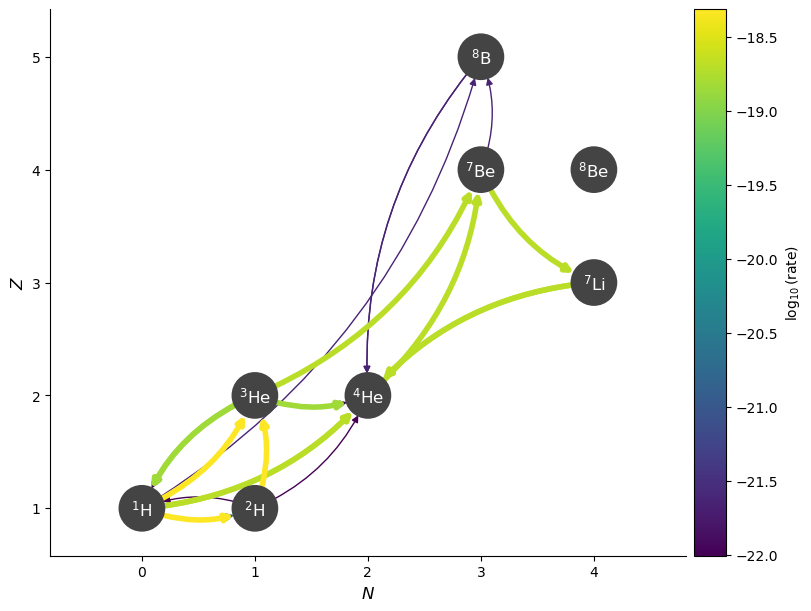

In [17]:
fig = net.plot(rho, T, comp,
               curved_edges=True,
               always_show_alpha=True,
               always_show_p=True,
               ydot_cutoff_value=1.e-25)

Now let's consider a bit hotter.  We'll keep the same composition

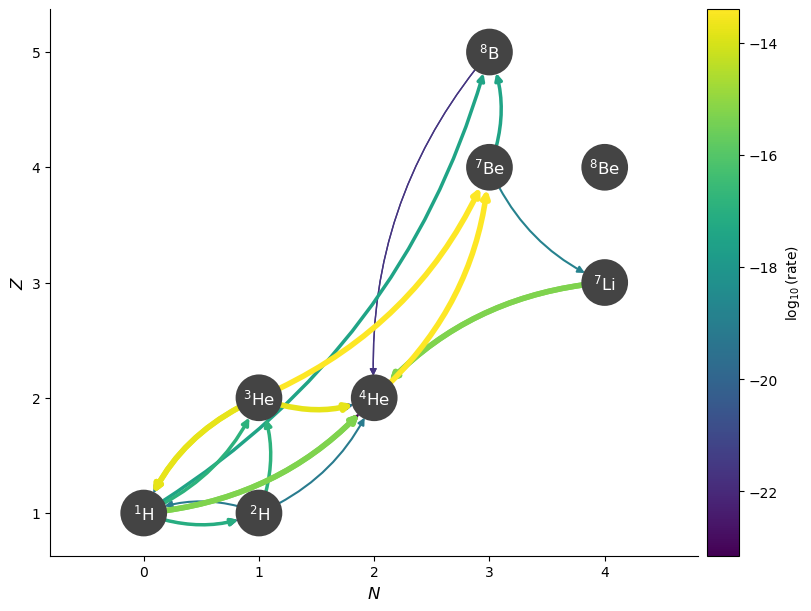

In [18]:
T = 3.5e7 

fig = net.plot(rho, T, comp,
               curved_edges=True,
               always_show_alpha=True,
               always_show_p=True,
               ydot_cutoff_value=1.e-25)

In [19]:
r_hot = net.evaluate_rates(rho, T, comp)
ratio_hot = r_hot[r33] / r_hot[r34]
ratio_hot

np.float64(0.4169468940939774)

Now we see that ${}^4\mathrm{He}({}^3\mathrm{He},\gamma){}^7\mathrm{Be}$ is much faster.

Overall, as the temperature increases, we see that the ${}^4\mathrm{He}({}^3\mathrm{He},\gamma){}^7\mathrm{Be}$ rate is more active.

These rates are _strongly_ dependent on the amount of ${}^3\mathrm{He}$ present, so we should really compute the equilibrium abundance before making the comparisons.

### Experiments

Try a few variations:

1. Change the network: include or exclude PP-II/PP-III nuclei. How does the equilibrium composition and branching ratio change?  
2. Change temperature: T = 1.5e7 K → T = 3.5e7 K. How do rates shift?  
3. Change density: rho = 150 → rho = 300 g/cm³. How does the composition change?

> Questions:  
> - Which reactions are most sensitive to temperature?  
> - Why is He-3 abundance critical for determining branching?  
> - How does this illustrate why stars burn hydrogen slowly but steadily?



<details>
<summary>Answers to questions</summary>

- At solar core temperature, PP-I dominates.  
- Increasing T favors PP-II and PP-III branching.  
- The equilibrium abundance of He-3 is critical for the branching ratios.  
- Including additional nuclei increases the complexity of the network and the number of reactions.  
- Reaction rates are highly temperature sensitive, consistent with stellar energy generation physics.

</details>

# In-class exercise: p-p chain vs. CNO

## Learning Goals

1. Explore the main sequences of the p-p chain and the CNO cycle.  
2. Identify rate-limiting steps in each.  
3. Study temperature dependence and determine which process dominates at different stellar temperatures.

We will explore the p-p chain and the CNO cycle to learn which rates are the slowest in each and when each dominates inside of stars.

We start by getting the rates from the [JINA ReacLib database](https://reaclib.jinaweb.org/index.php).  This has 80,000+ reaction rates in a standardized format.

In [20]:
rl = pyna.ReacLibLibrary()

## Simple p-p chain

We'll start by getting the 3 main sequences that make up the p-p chain.

In [21]:
pp_rates = ["p(p,)d",
            "d(p,g)he3",
            "he3(he3,pp)he4"]
rates = rl.get_rate_by_name(pp_rates)

We can look at which rates it pulled in:

In [22]:
for r in rates:
    print(r)

p + p ⟶ H2 + e⁺ + 𝜈
p + p + e⁻ ⟶ H2 + 𝜈
H2 + p ⟶ He3 + 𝛾
He3 + He3 ⟶ p + p + He4


Note that ReacLib actually splits the p+p rate into two.  We will add them together.

We can look at the temperature dependence of one of these rates

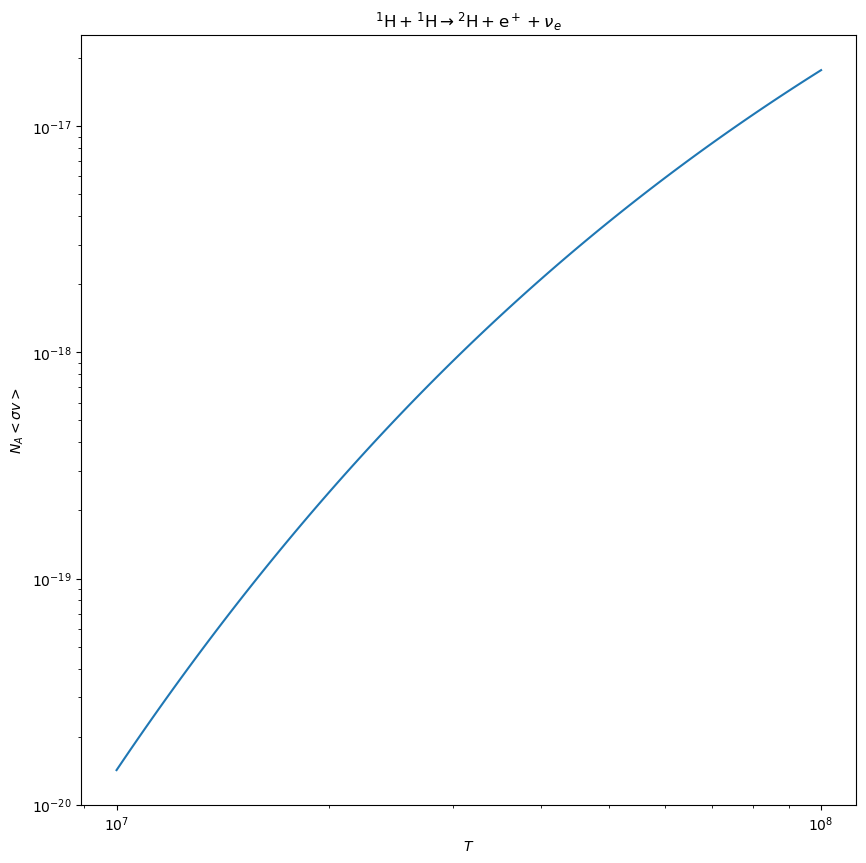

In [23]:
r = rates[0]
fig = r.plot(Tmin=1.e7, Tmax=1.e8)

We see that it is very temperature dependent

> **Question:** Which reactions in the p-p chain are most temperature sensitive? Which is slowest?  

<details>
<summary>Solution</summary>
- The first reaction, p+p → d, is the slowest because it involves a weak interaction.  
- The subsequent reactions (d+p → He3, He3+He3 → He4+2p) are much faster.  
- All reactions increase with temperature, but the weak-interaction step dominates the chain's overall timescale.
</details>

Next we build our network (we'll use a `RateCollection`) with these rates

In [24]:
rc_pp = pyna.RateCollection(rates=rates)

We can create a thermodynamic state approximating the center of the Sun and evaluate the rates

In [25]:
T = 1.5e7
rho = 150
comp = pyna.Composition(rc_pp.unique_nuclei)
comp.set_solar_like()

In [26]:
rc_pp.evaluate_rates(rho, T, comp)

{p + p ⟶ H2 + e⁺ + 𝜈: 2.978374743269655e-18,
 p + p + e⁻ ⟶ H2 + 𝜈: 1.357778476769111e-20,
 H2 + p ⟶ He3 + 𝛾: 0.005874533290651895,
 He3 + He3 ⟶ p + p + He4: 1.849294558580789e-13}

We see from this that the first reaction, p + p, is by far the slowest.

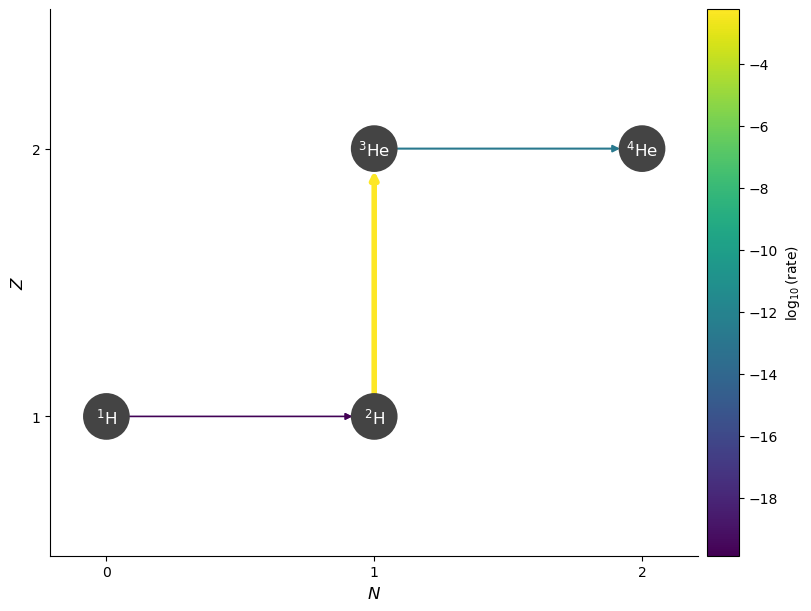

In [27]:
fig = rc_pp.plot(rho=rho, T=T, comp=comp, hide_xp=True, always_show_alpha=True)

> **Question:** Which reaction limits the overall p-p chain? Why is this rate so important?  

<details>
<summary>Solution</summary>
- The p+p → d reaction limits the p-p chain.  
- It is important because it involves the weak interaction (proton → neutron conversion), which is intrinsically slow.  
- This bottleneck regulates the Sun’s energy output and explains the long stellar lifetimes.
</details>


We can therefore approximate the p-p chain based on the slowest rate.  If we express the rate as:

$$r = r_0 \left (\frac{T}{T_0}\right )^\nu$$

then we can find the exponent $\nu$ about some temperature $T_0$

In [28]:
r_pp = rc_pp.get_rate_by_name("p(p,)d")[0]
T0 = 1.5e7
r_pp.get_rate_exponent(T0)

3.9735120801889896

Around the conditions in the Sun, the p-p chain has a temperature dependence of $\sim T^4$

> **Question:** What does the exponent tell you about how the reaction rate changes with temperature?  

<details>
<summary>Solution</summary>
- The exponent ν ≈ 4 means the reaction rate scales roughly as T^4 near the solar core temperature.  
- Small increases in temperature increase the rate moderately, but the weak interaction keeps the overall reaction slow.
</details>

## CNO

Now we consider the main CNO cycle.  This involves 6 rates

In [29]:
cno_rates = ["c12(p,g)n13",
             "c13(p,g)n14",
             "n13(,)c13",
             "n14(p,g)o15",
             "n15(p,a)c12",
             "o15(,)n15"]
rates = rl.get_rate_by_name(cno_rates)

In [30]:
for r in rates:
    print(r)

C12 + p ⟶ N13 + 𝛾
C13 + p ⟶ N14 + 𝛾
N13 ⟶ C13 + e⁺ + 𝜈
N14 + p ⟶ O15 + 𝛾
N15 + p ⟶ He4 + C12
O15 ⟶ N15 + e⁺ + 𝜈


In [31]:
rc_cno = pyna.RateCollection(rates=rates)

In [32]:
comp = pyna.Composition(rc_cno.unique_nuclei)
comp.set_solar_like()

Again we can look evaluate each of the rates:

In [33]:
rc_cno.evaluate_rates(rho, T, comp)

{C12 + p ⟶ N13 + 𝛾: 1.0467759242295144e-17,
 C13 + p ⟶ N14 + 𝛾: 3.176211597339995e-17,
 N13 ⟶ C13 + e⁺ + 𝜈: 2.9720852738029567e-07,
 N14 + p ⟶ O15 + 𝛾: 1.7295781984662848e-20,
 N15 + p ⟶ He4 + C12: 6.954822248932605e-16,
 O15 ⟶ N15 + e⁺ + 𝜈: 1.2625681768893481e-06}

> **Question:** Which reaction is the slowest in the CNO cycle? How does this compare to the slowest p-p reaction?  

<details>
<summary>Solution</summary>
- The slowest reaction is N14(p,γ)O15.  
- It is much faster than p+p in absolute terms at the Sun's core temperature, but its strong temperature dependence makes it negligible in the Sun compared to p-p.
</details>

In [34]:
r_cno = rc_cno.get_rate_by_name("n14(p,g)o15")

This is a much steeper function of temperature.  Let's explore the temperature dependence around a few points

In [35]:
for T in [1.e7, 2.e7, 3.e7, 4.e7]:
    print(f"T = {T}, nu = {r_cno.get_rate_exponent(T)}")

T = 10000000.0, nu = 22.829615097171867
T = 20000000.0, nu = 17.966372387768573
T = 30000000.0, nu = 15.601859314950396
T = 40000000.0, nu = 14.115346885210606


Here's what the CNO cycle looks like

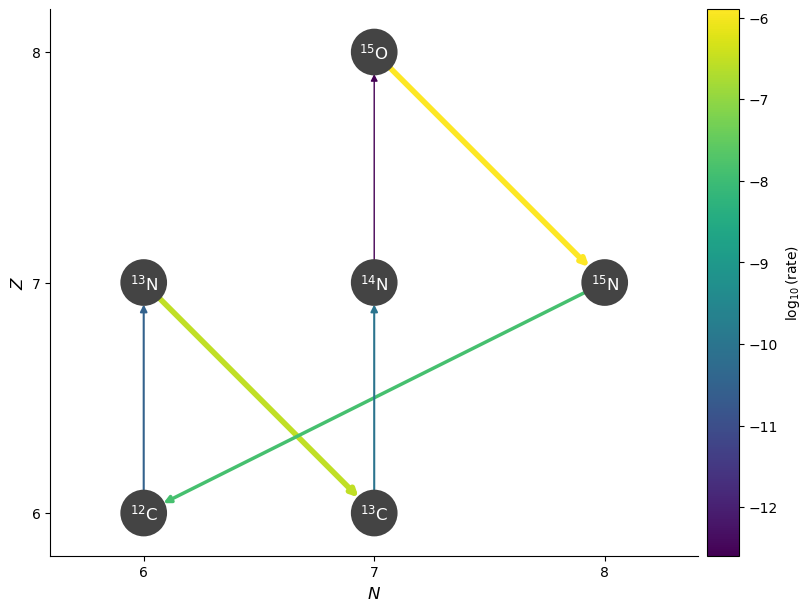

In [36]:
fig = rc_cno.plot(rho=rho, T=T, comp=comp, hide_xp=True)

> **Question:** How does the temperature exponent for CNO compare to the p-p chain? What does this imply about which stars are powered by CNO?  

<details>
<summary>Solution</summary>
- ν ≈ 18 at T ≈ 2e7 K, much steeper than the p-p chain (ν ≈ 4).  
- This means small increases in core temperature drastically increase the CNO rate.  
- Stars more massive than the Sun (T_core > ~2e7 K) are dominated by the CNO cycle.
</details>

## Comparing p-p vs. CNO

The temperature dependence suggests that if the temperature were a little higher, then CNO would go faster then p-p.  We can plot the two rate-limiting rates on the same axes

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mesa_reader as mr


In [38]:
Ts = np.logspace(6.8, 8, 50)

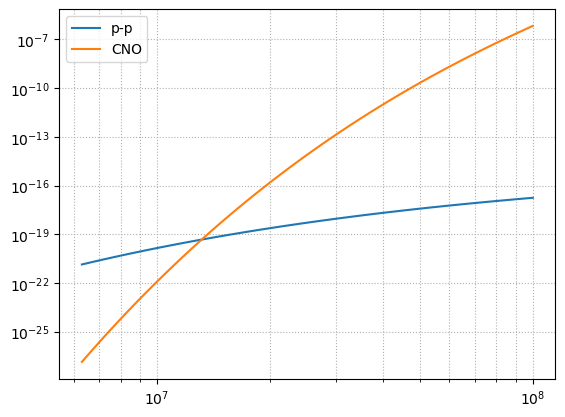

In [39]:
fig, ax = plt.subplots()

ax.plot(Ts, [r_pp.eval(q) for q in Ts], label="p-p")
ax.plot(Ts, [r_cno.eval(q) for q in Ts], label="CNO")
ax.set_xscale("log")
ax.set_yscale("log")
ax.grid(linestyle=":", which="both")
ax.legend()

Notice that they cross over at a temperature just hotter than the Sun's core.  This means that stars more massive than the Sun (actually, about $1.5~M_\odot$) are powered by CNO and less massive stars are powered by p-p.  The strong $T$ dependence of CNO will play a role in determining the structure of those more massive stars.

> **Questions:**  
> 1. At what temperature do the p-p and CNO chains have comparable rates?  
> 2. What does this tell you about which stars are powered by CNO vs. p-p?  
> 3. How does the strong temperature dependence of CNO influence stellar structure?  

<details>
<summary>Solution</summary>
1. The rates cross around T ~ 2e7 K.  
2. Stars with T_core < 2e7 K (like the Sun) are p-p dominated; hotter stars (M > 1.5 M☉) are CNO dominated.  
3. The strong temperature dependence leads to very centrally concentrated energy generation, producing convective cores in massive stars to transport the energy efficiently.
</details>

# In-Class Assignment: Stellar Energy Sources

### Learning Objectives

- determine dominant reaction in low mass and massive star models

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Download the following model files locally.

* $1 M_\odot$: [1m_h_dep_history.data](data/1m_h_dep_history.data);

* $3 M_\odot$: [3m_h_dep_history.data](data/3m_h_dep_history.data);

* $20 M_\odot$: [20m_he_dep_history.data](data/20m_he_dep_history.data);

## Dominant Burning Category

Using the $1 M_\odot$ and $3M_\odot$ model MESA history data: 

### a. 

1. Plot the `pp` and `cno` burning categories over time to determine which dominates in each model. 

In [ ]:
## a results here

### b. 

1. Compare the central temperature of each models and compare with the expected central temparature of the Sun.

> Which is the dominant burning source in the Sun?

In [ ]:
## b results here

## Dominant Burning in Massive Stars

Using the Massive Star model MESA history data: 

### c 

1. Compare the `tri_alpha` and `c_alpha` categories and determine which is dominant and when.

In [ ]:
## c results here

### d 

1. Identify the critical central temperature, he4 and c12 mass fraction when this crossover occurs.

In [ ]:
### d results here